In [1070]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import xgboost 
from xgboost import XGBClassifier

In [1071]:
#load home games data set
file_path = ('MLB 2021-2022 STATS.csv')
data = pd.read_csv(file_path, encoding = 'Latin-1', sep = ",")
data.head()

,ï»¿Gm#,Date,Unnamed: 2,Tm,Unnamed: 4,Opp,W/L,R,RA,Inn,...,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled,BA,OBP,SLG,OPS
0,1,Thursday Apr 1,boxscore,OAK,NaN,HOU,L,1,8,NaN,...,3:28,N,10436.0,1.06,-,NaN,0.200,0.286,0.267,0.552
1,2,Friday Apr 2,boxscore,OAK,NaN,HOU,L,5,9,NaN,...,3:34,N,5446.0,1.01,--,NaN,0.222,0.311,0.349,0.660
2,3,Saturday Apr 3,boxscore,OAK,NaN,HOU,L,1,9,NaN,...,3:24,D,5803.0,0.96,---,NaN,0.185,0.294,0.272,0.565
3,4,Sunday Apr 4,boxscore,OAK,NaN,HOU,L,2,9,NaN,...,3:15,D,4504.0,0.85,----,NaN,0.171,0.268,0.268,0.536
4,5,Monday Apr 5,boxscore,OAK,NaN,LAD,L,3,10,NaN,...,3:35,N,6653.0,0.69,-----,NaN,0.172,0.267,0.268,0.534


In [1072]:
#removing columns with all nan values and columns not needed
data.drop(axis=1, columns=['Unnamed: 2','W-L','Inn','Win','Rank','Save','Streak','cLI','Orig. Scheduled','Loss','GB','R'], inplace=True)
data.dropna(axis=1, how ='all', inplace=True)
data.dropna(subset=['Attendance'], inplace=False)

,ï»¿Gm#,Date,Tm,Unnamed: 4,Opp,W/L,RA,Time,D/N,Attendance,BA,OBP,SLG,OPS
0,1,Thursday Apr 1,OAK,NaN,HOU,L,8,3:28,N,10436.0,0.200,0.286,0.267,0.552
1,2,Friday Apr 2,OAK,NaN,HOU,L,9,3:34,N,5446.0,0.222,0.311,0.349,0.660
2,3,Saturday Apr 3,OAK,NaN,HOU,L,9,3:24,D,5803.0,0.185,0.294,0.272,0.565
3,4,Sunday Apr 4,OAK,NaN,HOU,L,9,3:15,D,4504.0,0.171,0.268,0.268,0.536
4,5,Monday Apr 5,OAK,NaN,LAD,L,10,3:35,N,6653.0,0.172,0.267,0.268,0.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,158,Saturday Oct 1,ATL,NaN,NYM,W,2,2:54,N,42561.0,0.253,0.317,0.444,0.761
9714,159,Sunday Oct 2,ATL,NaN,NYM,W,3,3:21,N,42713.0,0.253,0.317,0.444,0.761
9715,160,Monday Oct 3,ATL,@,MIA,L,4,2:29,N,10767.0,0.252,0.316,0.443,0.759
9716,161,Tuesday Oct 4,ATL,@,MIA,W,1,3:09,N,14138.0,0.252,0.317,0.442,0.758


In [1073]:
#checking for unique characters in Unnamed:4 column to change values to binary values
data['Unnamed: 4'].unique()

array([nan, '@'], dtype=object)

In [1074]:
#changing @ and nan to 1's and 0's
data['Unnamed: 4'].replace(to_replace=['@'], value=[0], inplace=True)
data.fillna(1, inplace=True)

In [1075]:
#checking for nan values
data.isna().any()

ï»¿Gm#        False
Date          False
Tm            False
Unnamed: 4    False
Opp           False
W/L           False
RA            False
Time          False
D/N           False
Attendance    False
BA            False
OBP           False
SLG           False
OPS           False
dtype: bool

In [1076]:
data.dropna(subset=['Attendance'], inplace=True)
data.dropna(subset=['Unnamed: 4'], inplace=True)
data.isna().any()

ï»¿Gm#        False
Date          False
Tm            False
Unnamed: 4    False
Opp           False
W/L           False
RA            False
Time          False
D/N           False
Attendance    False
BA            False
OBP           False
SLG           False
OPS           False
dtype: bool

In [1077]:
#checking shape of data frame
data.shape
#data.head()

(9718, 14)

In [1078]:
#changing name of columms
data.rename(columns={'ï»¿Gm#':'GM#'} , inplace=True)

data.rename(columns={'Unnamed: 4':'Home/Away'},inplace=True)
data.head()

,GM#,Date,Tm,Home/Away,Opp,W/L,RA,Time,D/N,Attendance,BA,OBP,SLG,OPS
0,1,Thursday Apr 1,OAK,1.0,HOU,L,8,3:28,N,10436.0,0.200,0.286,0.267,0.552
1,2,Friday Apr 2,OAK,1.0,HOU,L,9,3:34,N,5446.0,0.222,0.311,0.349,0.660
2,3,Saturday Apr 3,OAK,1.0,HOU,L,9,3:24,D,5803.0,0.185,0.294,0.272,0.565
3,4,Sunday Apr 4,OAK,1.0,HOU,L,9,3:15,D,4504.0,0.171,0.268,0.268,0.536
4,5,Monday Apr 5,OAK,1.0,LAD,L,10,3:35,N,6653.0,0.172,0.267,0.268,0.534


In [1079]:
#checking for unique characters in W/L column to change values to binary values
data['W/L'].unique()

array(['L', 'W-wo', 'W', 'L-wo'], dtype=object)

In [1080]:
#changing wins and losses to 1's and 0's
data['W/L'].replace(to_replace=['L', 'W-wo','W','L-wo'], value=[0, 1,1,0], inplace=True)
data['W/L'].unique()

array([0, 1])

In [1081]:
#checking for unique characters in W/L column to change values to binary values
data['D/N'].unique()

array(['N', 'D'], dtype=object)

In [1082]:
#changing Day and Night to 1's and 0's
data['D/N'].replace(to_replace=['D', 'N'], value=[0, 1], inplace=True)
data['D/N'].unique()

array([1, 0])

In [1083]:
#checking data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GM#         9718 non-null   int64  
 1   Date        9718 non-null   object 
 2   Tm          9718 non-null   object 
 3   Home/Away   9718 non-null   float64
 4   Opp         9718 non-null   object 
 5   W/L         9718 non-null   int64  
 6   RA          9718 non-null   int64  
 7   Time        9718 non-null   object 
 8   D/N         9718 non-null   int64  
 9   Attendance  9718 non-null   float64
 10  BA          9718 non-null   float64
 11  OBP         9718 non-null   float64
 12  SLG         9718 non-null   float64
 13  OPS         9718 non-null   float64
dtypes: float64(6), int64(4), object(4)
memory usage: 1.0+ MB


In [1084]:
#Changing time to a float
data['Time2'] = data['Time'].apply(lambda x: sum([a*b for a,b in zip(list(map(int,x.split(':')))[::-1],[1/60,1,60])]))
data.head()

,GM#,Date,Tm,Home/Away,Opp,W/L,RA,Time,D/N,Attendance,BA,OBP,SLG,OPS,Time2
0,1,Thursday Apr 1,OAK,1.0,HOU,0,8,3:28,1,10436.0,0.200,0.286,0.267,0.552,3.466667
1,2,Friday Apr 2,OAK,1.0,HOU,0,9,3:34,1,5446.0,0.222,0.311,0.349,0.660,3.566667
2,3,Saturday Apr 3,OAK,1.0,HOU,0,9,3:24,0,5803.0,0.185,0.294,0.272,0.565,3.400000
3,4,Sunday Apr 4,OAK,1.0,HOU,0,9,3:15,0,4504.0,0.171,0.268,0.268,0.536,3.250000
4,5,Monday Apr 5,OAK,1.0,LAD,0,10,3:35,1,6653.0,0.172,0.267,0.268,0.534,3.583333


/var/folders/fs/3d1xmqqs54gfkwh5k4n_0kn80000gn/T/ipykernel_86215/2682715004.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr() # Calculate correlation matrix


<function matplotlib.pyplot.show(close=None, block=None)>

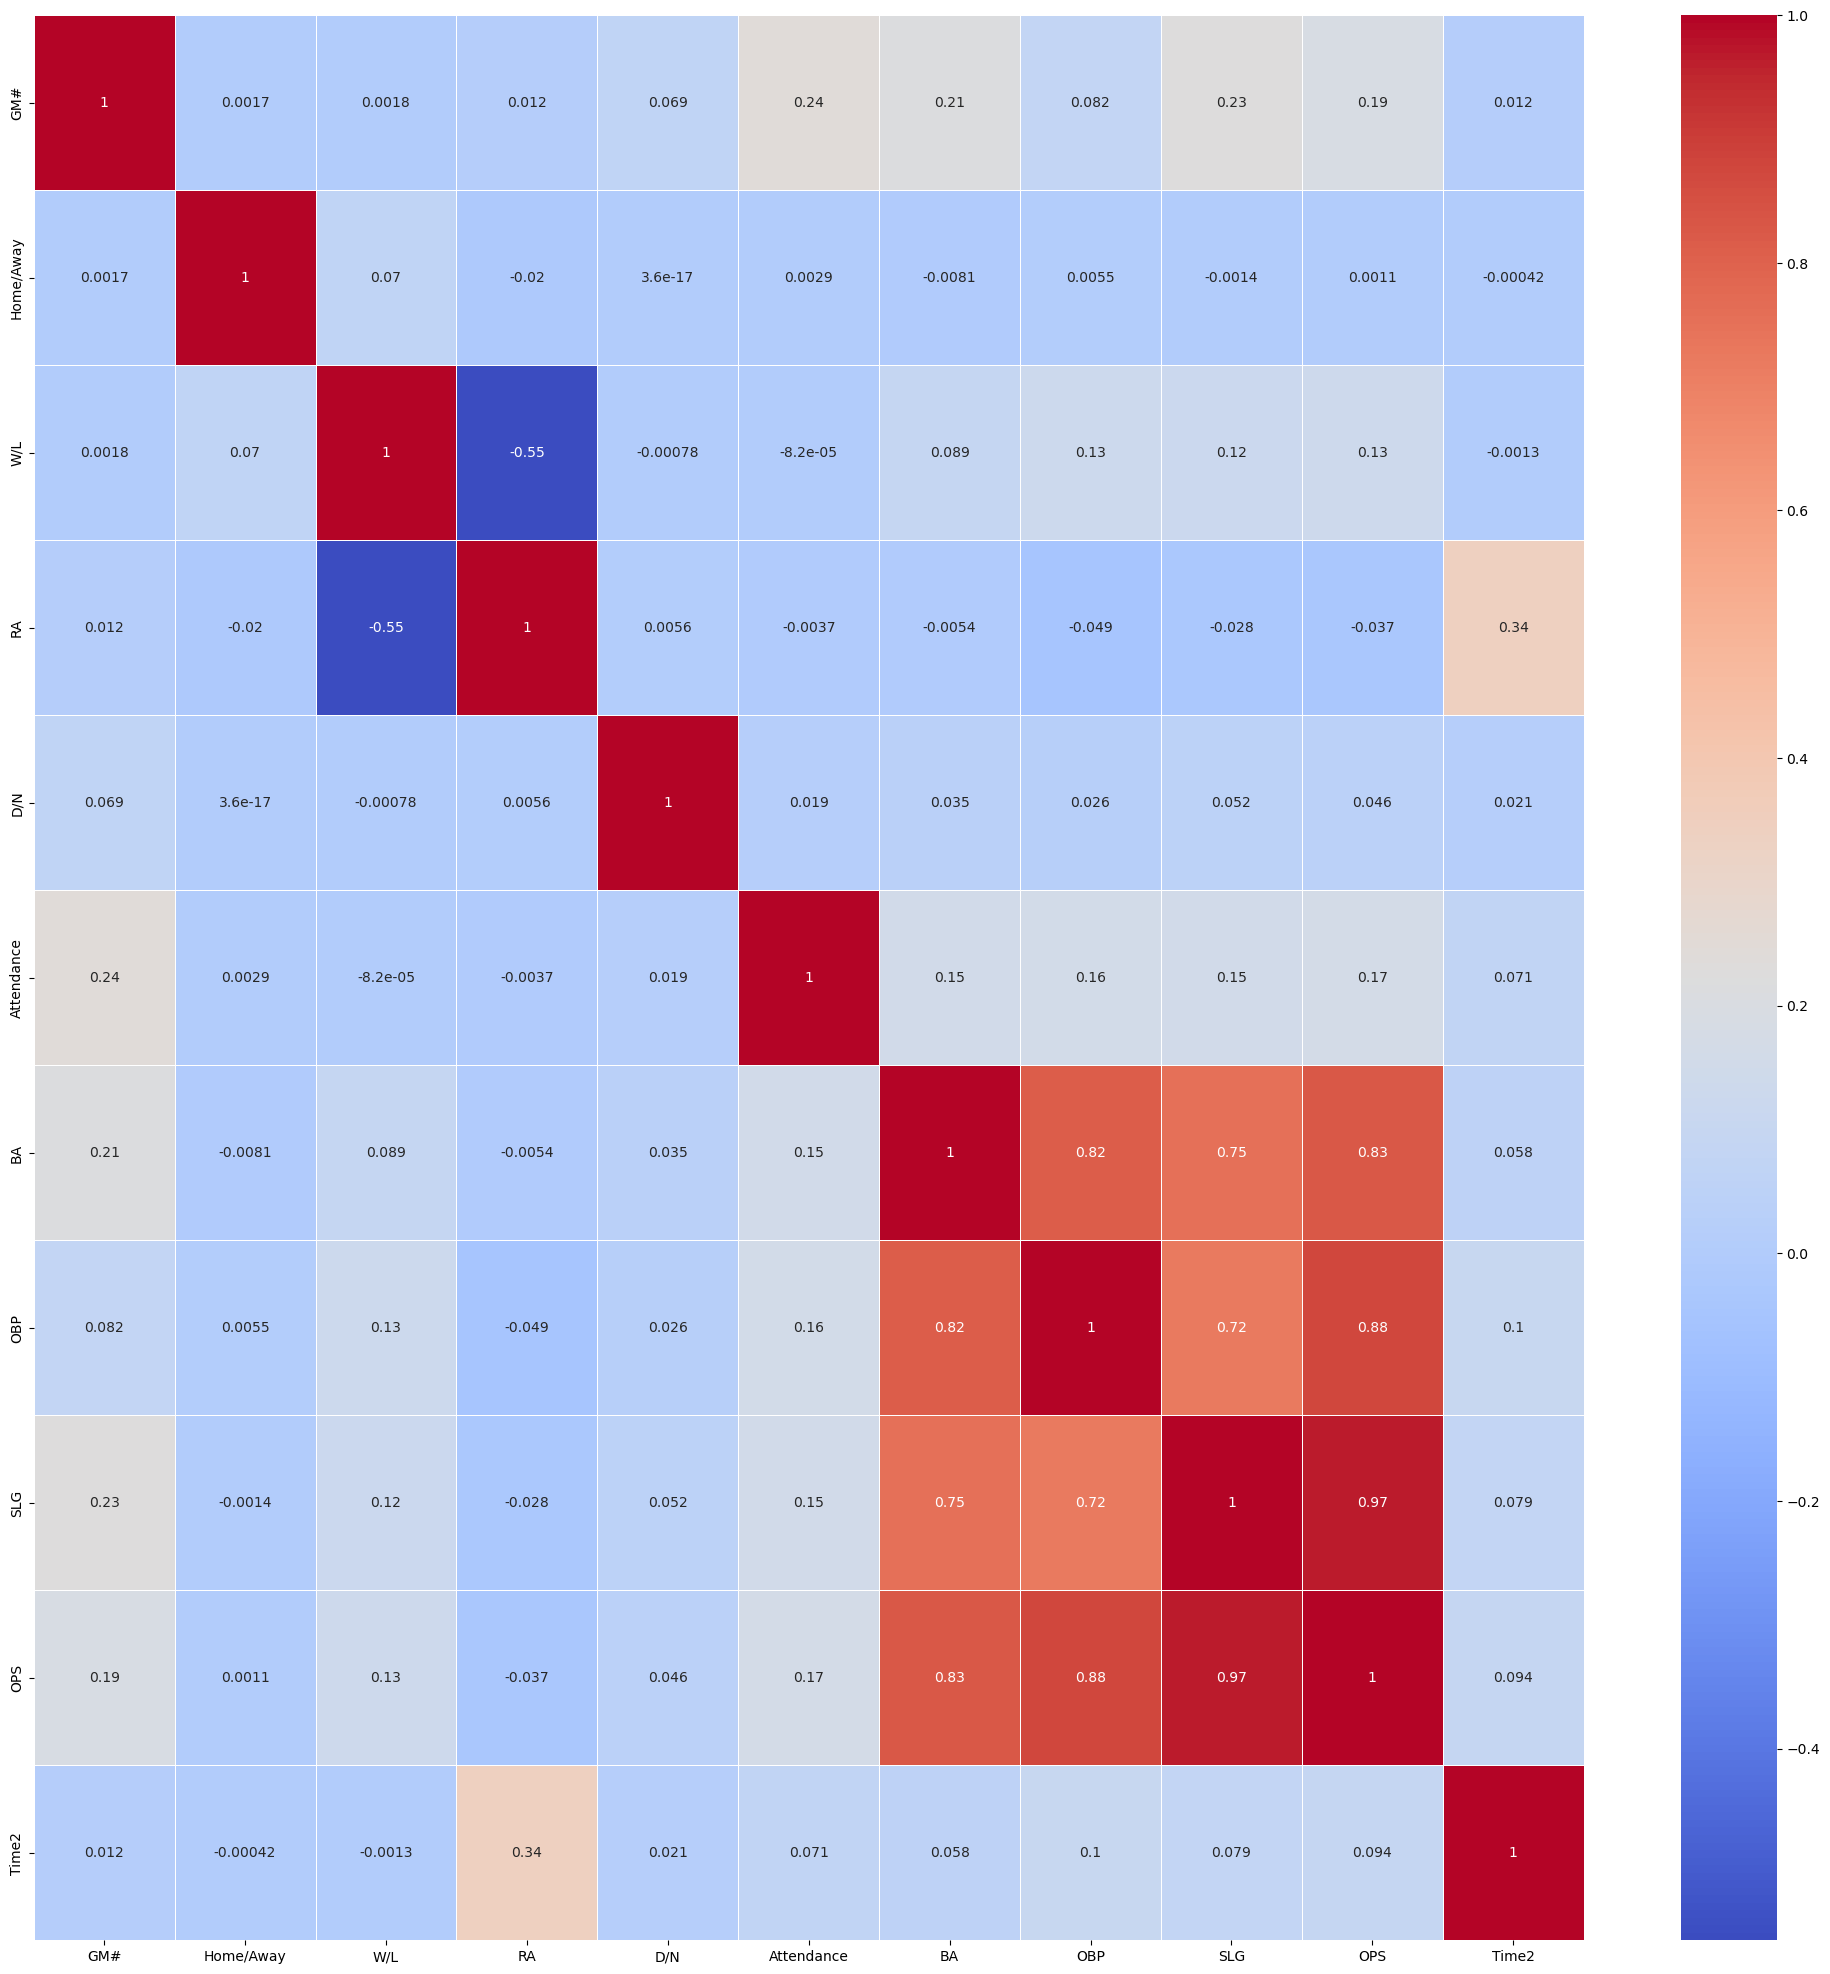

In [1085]:
#correlation matrix
correlation_matrix = data.corr() # Calculate correlation matrix

# Create a figure and axes
f, ax = plt.subplots(figsize=(25, 25))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.show

In [1086]:
#Creating array for features
X = (data.drop(['Date','Opp','Tm','W/L','Time'], axis=1).values)
#target variable
y = (data['W/L'].values)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [1087]:
#scaling the data
scaler = StandardScaler()


scaler.fit(X_train)

X_train_std = pd.DataFrame(scaler.transform(X_train))
X_test_std = pd.DataFrame(scaler.transform(X_test))

In [1088]:
#setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #fit the model
    knn.fit(X_train_std,y_train)
    
    #compute the accuracy on the training set
    train_accuracy[i] = knn.score(X_train_std,y_train)
    
    #compute the accuracy on the test set
    test_accuracy[i] = knn.score(X_test_std,y_test)

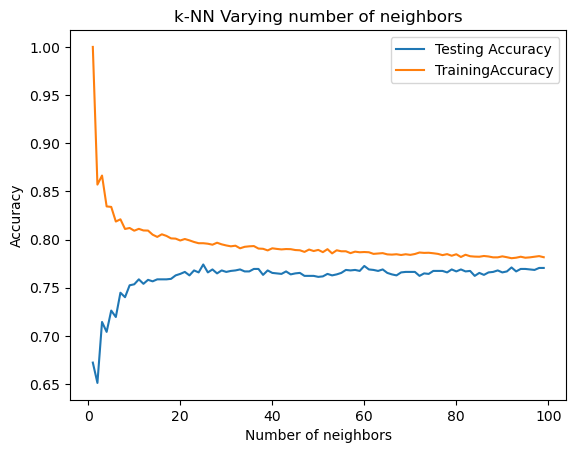

In [1089]:
#generate plot
plt.title ('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='TrainingAccuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [1090]:
#setup a knn classifier with k neighbors
knn =KNeighborsClassifier(n_neighbors=60)

In [1091]:
#fit the model
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=60)

In [1092]:
#get accuracy
knn_score = knn.score(X_test_std, y_test)
knn_score

0.772633744855967

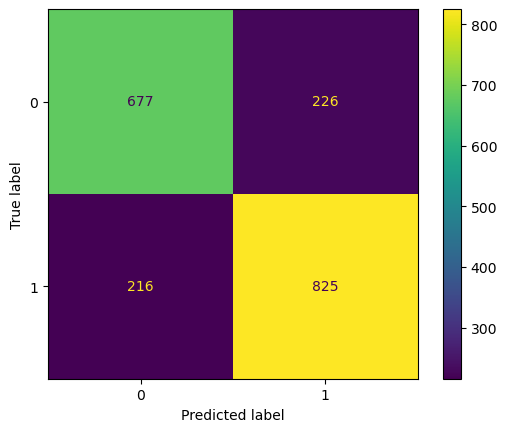

In [1093]:
y_pred=knn.predict(X_test_std)
cm= confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [1094]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       903
           1       0.78      0.79      0.79      1041

    accuracy                           0.77      1944
   macro avg       0.77      0.77      0.77      1944
weighted avg       0.77      0.77      0.77      1944



In [1095]:
y_pred_proba = knn.predict_proba(X_test_std)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

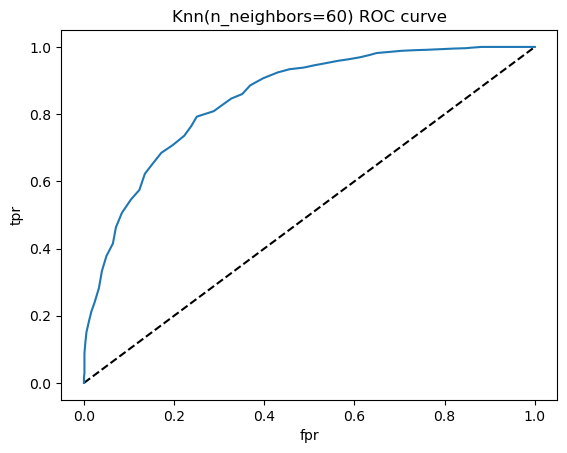

In [1096]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=60) ROC curve')
plt.show()

In [1097]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_proba)

0.8483760503732355

In [1098]:
y_pred_proba = knn.predict_proba(X_test_std)[:,1]
pd.DataFrame(y_pred_proba)

,0
0,0.083333
1,0.750000
2,0.050000
3,0.416667
4,0.800000
...,...
1939,0.166667
1940,0.633333
1941,0.500000
1942,0.650000


In [1099]:
# Creating the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'n_neighbors': np.arange(1,100)}
 
# Instantiating logistic regression classifier
#logreg = LogisticRegression()
knn = KNeighborsClassifier() 
# Instantiating the GridSearchCV object
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
 
knn_cv.fit(X_train_std,y_train)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

Tuned Logistic Regression Parameters: {'n_neighbors': 44}
Best score is 0.7777205593282763


In [1100]:
from sklearn.naive_bayes import GaussianNB

In [1101]:
# Build a Gaussian Classifier
model1 = GaussianNB()

# Model training
model1.fit(X_train_std, y_train)

# Predict Output
accuracy = model1.score(X_test_std,y_test)
accuracy
#print("Actual Value:", y_test[6])
#print("Predicted Value:", predicted[0])

0.7391975308641975

In [1102]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       903
           1       0.78      0.79      0.79      1041

    accuracy                           0.77      1944
   macro avg       0.77      0.77      0.77      1944
weighted avg       0.77      0.77      0.77      1944



In [1103]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train_std, y_train)

y_pred1 = logreg.predict(X_test_std)

In [1104]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
cnf_matrix

array([[695, 208],
       [202, 839]])

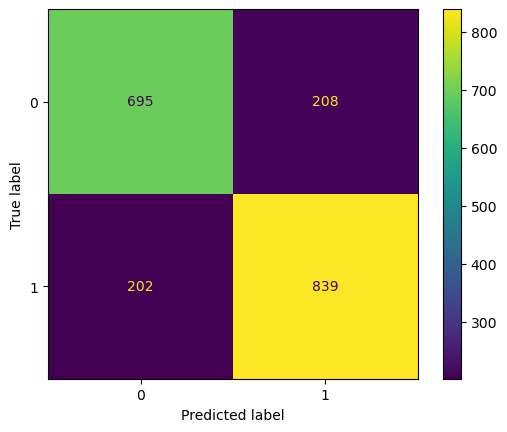

In [1105]:
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix).plot();

In [1106]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       903
           1       0.80      0.81      0.80      1041

    accuracy                           0.79      1944
   macro avg       0.79      0.79      0.79      1944
weighted avg       0.79      0.79      0.79      1944



In [1107]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 0, 5)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
#logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_cv.fit(X_train_std, y_train)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1.0}
Best score is 0.7882674314185568


In [1109]:
#Creating array for features
X1 = pd.DataFrame(data.drop(['Date','Opp','Tm','W/L','Time'], axis=1))
#target variable
y1 = (data['W/L'].values)
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=42)


#scaling data
#scaling the data
scaler = StandardScaler()


scaler.fit(X1_train)

X1_train_std = pd.DataFrame(scaler.transform(X1_train))
X1_test_std = pd.DataFrame(scaler.transform(X1_test))
X1_train_std.columns=X1.columns
X1_test_std.columns=X1.columns

In [1110]:
#defining classifer model
xgbc = XGBClassifier()
print(xgbc)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=None,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [1111]:
xgbc.fit(X1_train_std, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1112]:
scores = cross_val_score(xgbc, X1_train_std, y1_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.77


In [1113]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X1_train_std, y1_train, cv=kfold )
k_cv_scores_mean = kf_cv_scores.mean()
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.77


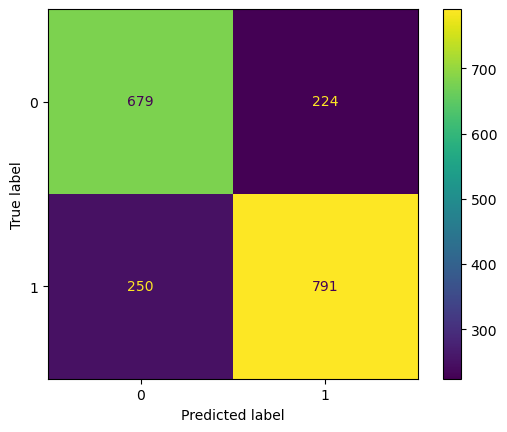

In [1114]:
ypred2 = xgbc.predict(X1_test_std)
cm2 = metrics.confusion_matrix(y1_test,ypred2) 
ConfusionMatrixDisplay(confusion_matrix=cm2).plot();

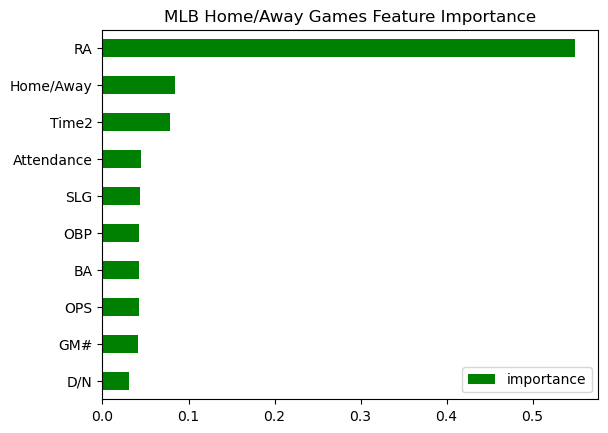

In [1115]:
features = ['GM#', 'Home/Away', 'D/N', 'Attendance','BA','OBP','SLG','OPS','Time2']
feature_importance = pd.DataFrame(data=xgbc.feature_importances_,
             index=xgbc.feature_names_in_,
             columns=['importance'])
feature_importance.sort_values('importance').plot(kind='barh', title='MLB Home/Away Games Feature Importance', color='green')
plt.show()

In [1116]:
data2 = ({'Accuracy':[knn_cv.best_score_,accuracy,logreg_cv.best_score_,k_cv_scores_mean]})
Comparison= pd.DataFrame(data2, index=['KNN','GaussianNB','LogReg Classifier', 'XGB Classifier'])
Comparison

,Accuracy
KNN,0.777721
GaussianNB,0.739198
LogReg Classifier,0.788267
XGB Classifier,0.766014


In [1200]:
aggregation_functions = {'RA': 'sum', 'W/L': 'sum', 'Attendance': 'sum','Time2':'sum'}
df_new = data.groupby(data['Tm']).aggregate(aggregation_functions)
df_new

,RA,W/L,Attendance,Time2
Tm,,,,
ARI,1633,126,6618509.0,1028.216667
ATL,1265,189,9088410.0,1009.666667
BAL,1644,135,5589533.0,1009.316667
BOS,1536,170,8040502.0,1046.666667
CHC,1570,145,8781929.0,1029.683333
CHW,1353,174,6657126.0,1017.250000
CIN,1575,145,6908357.0,1023.683333
CLE,1361,172,5761033.0,984.533333
COL,1669,142,8360206.0,1015.850000


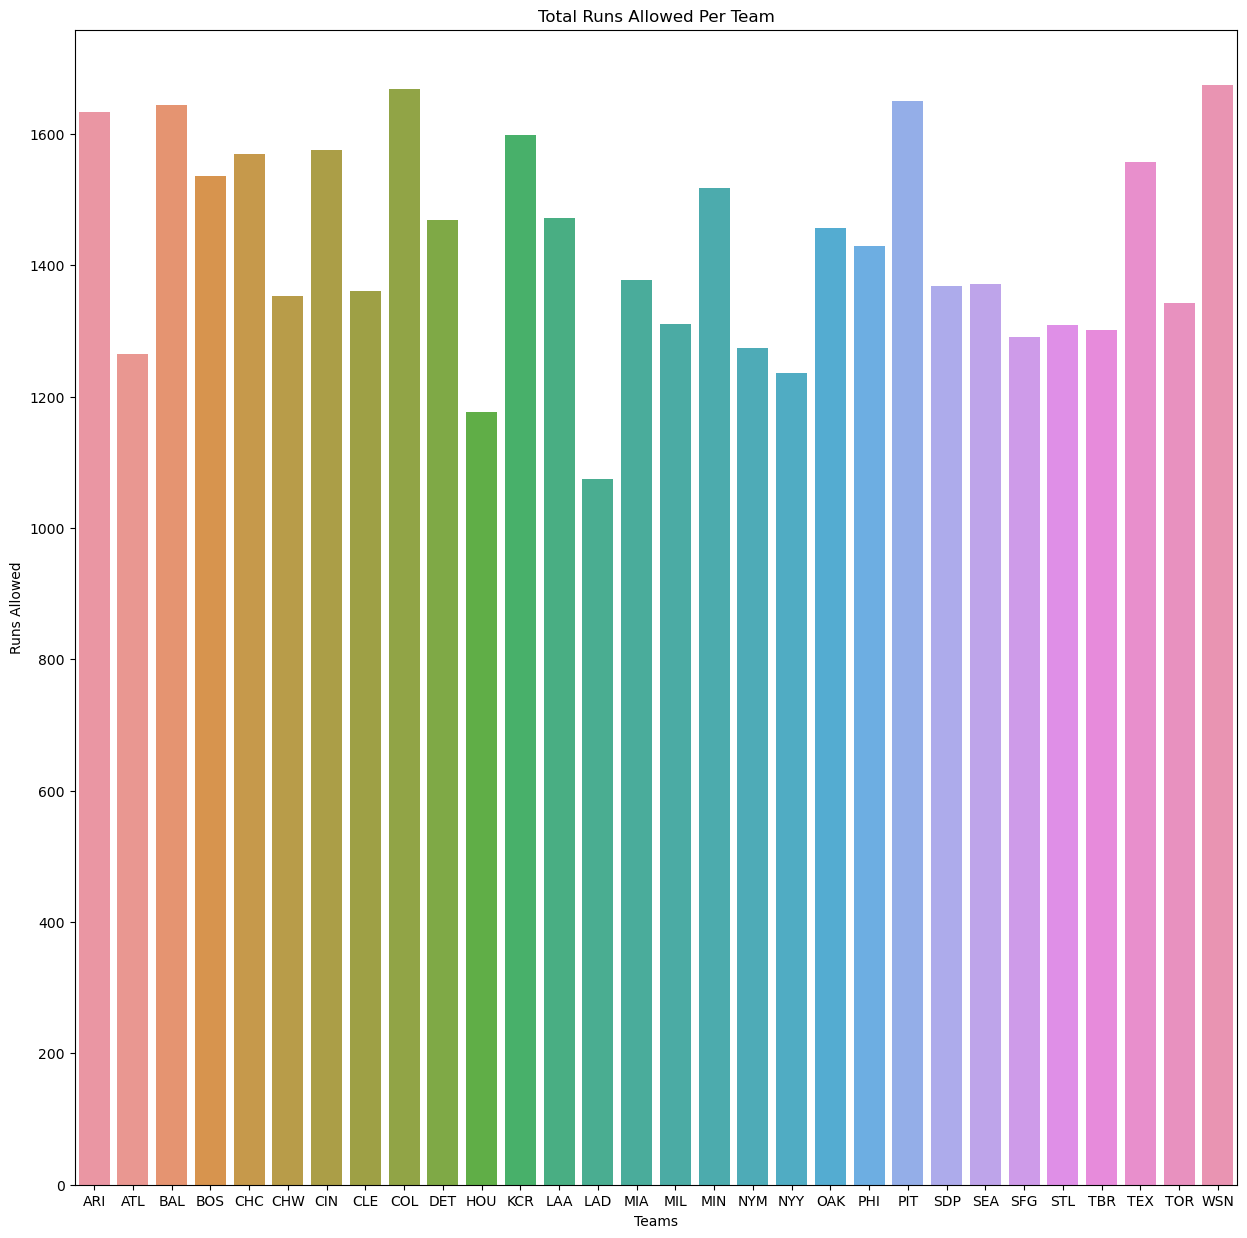

In [1185]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x=df_new.index,y='RA', data=df_new,ax=ax)
plt.xlabel('Teams')
plt.ylabel('Runs Allowed')
plt.title('Total Runs Allowed Per Team')
plt.show()

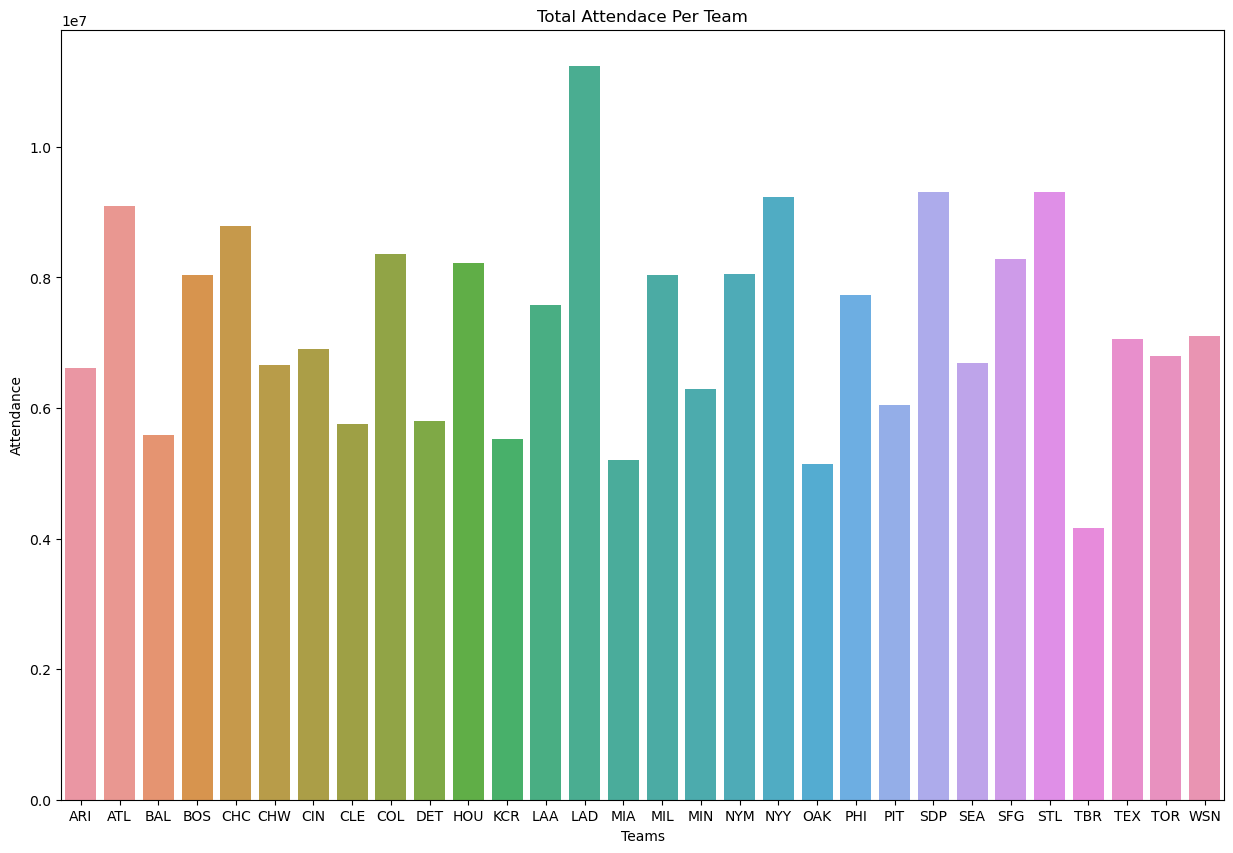

In [1188]:
plt.figure(figsize=(15, 10))
sns.barplot(x=df_new.index, y= df_new['Attendance'],)
plt.xlabel('Teams')
plt.ylabel('Attendance')
plt.title('Total Attendace Per Team')
plt.show()

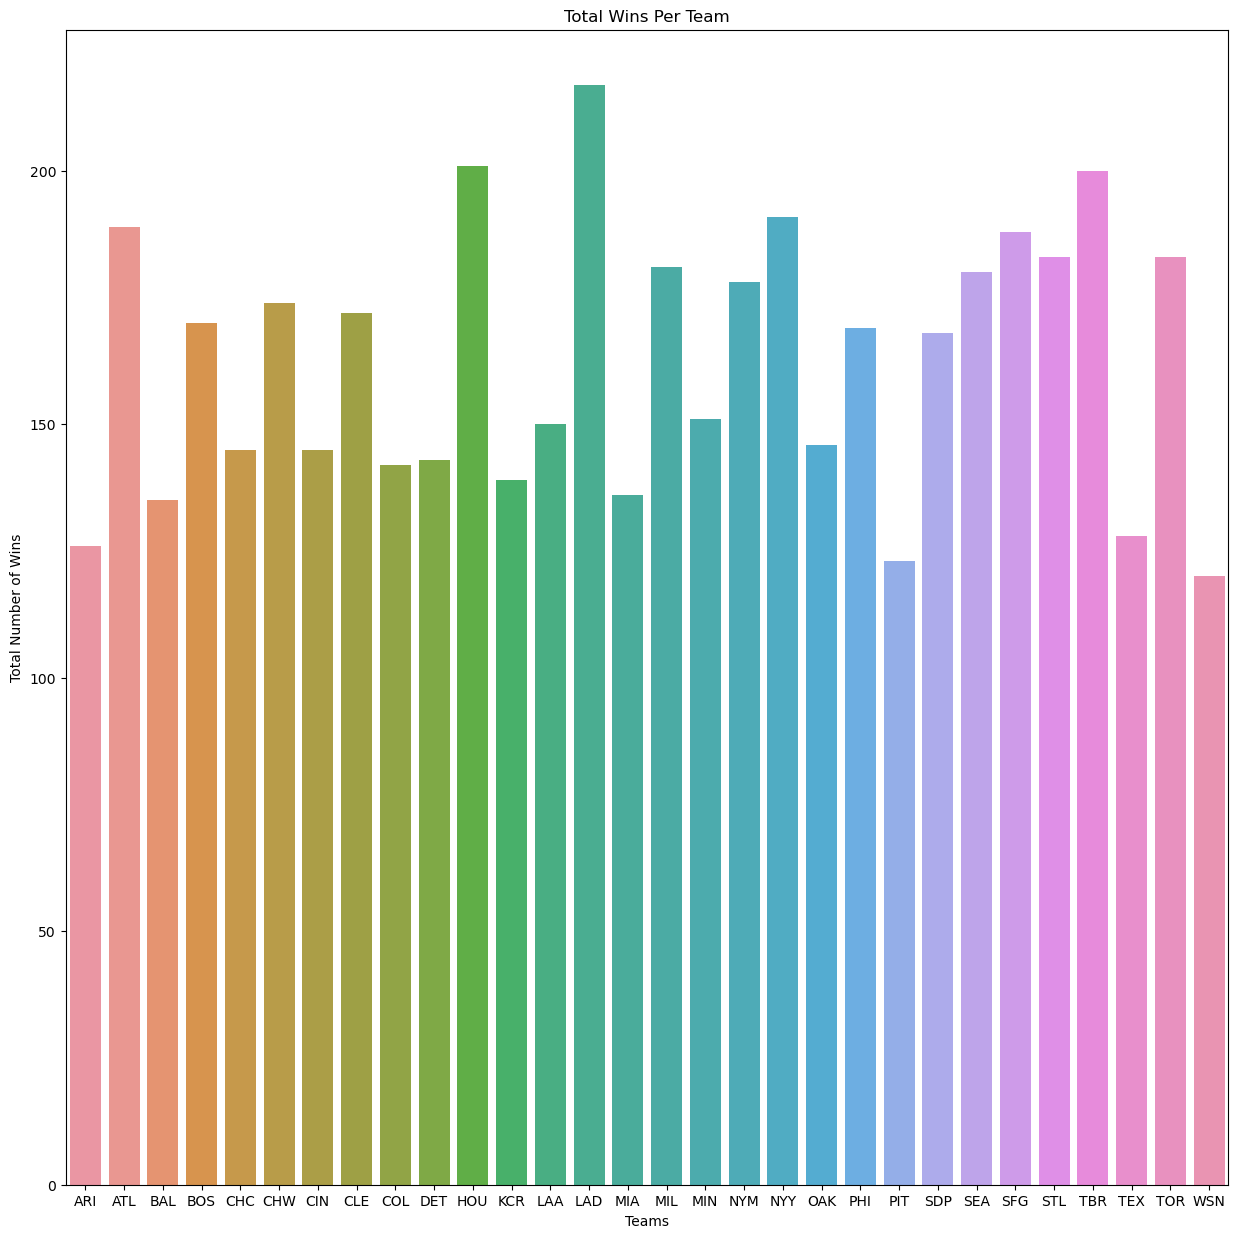

In [1202]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x=df_new.index,y='W/L', data=df_new,ax=ax)
plt.xlabel('Teams')
plt.ylabel('Total Number of Wins')
plt.title('Total Wins Per Team')
plt.show()

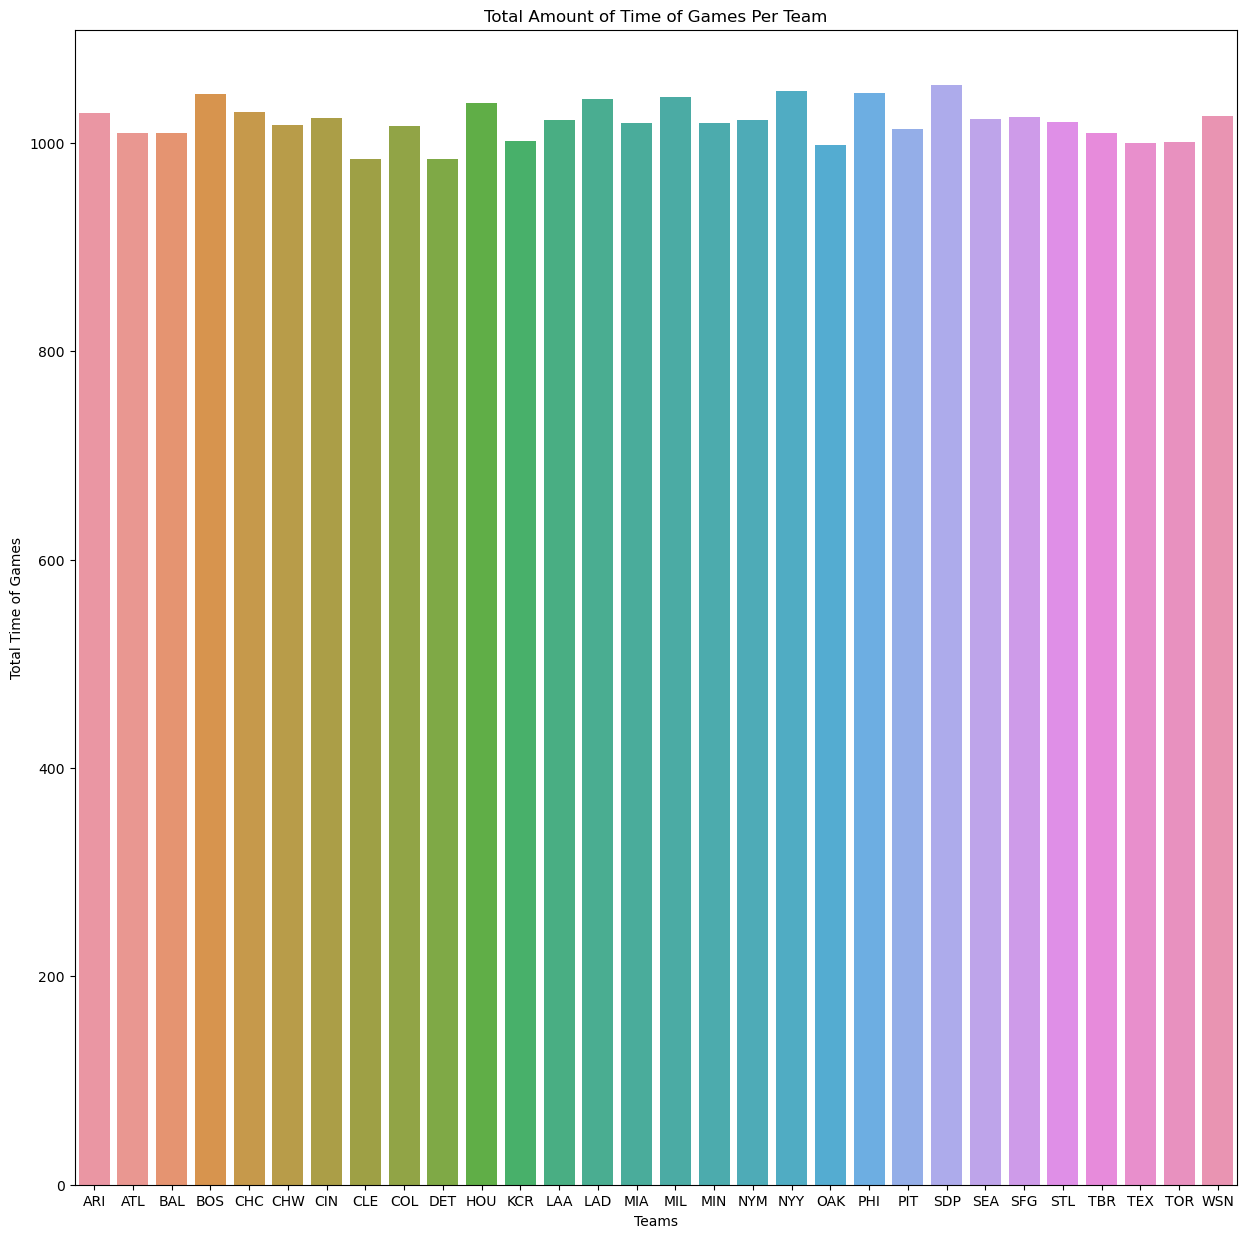

In [1201]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x=df_new.index,y='Time2', data=df_new,ax=ax)
plt.xlabel('Teams')
plt.ylabel('Total Time of Games')
plt.title('Total Amount of Time of Games Per Team')
plt.show()